# landcover-hack ODC workshop 2019

This is a test notebook to derive a level 3 classification for select areas in Australia based on the FAO LCCS landcover classification

In [1]:
import numpy
import xarray
import scipy
from matplotlib import pyplot
from matplotlib import cm
import datacube
from datacube.storage import masking

#import classification script
import lccs_l3

Data input from AWS DEA

In [50]:
# set up object and bounds

dc = datacube.Datacube(app="le_lccs")

pixel_size_x = -100
pixel_size_y = 100
res = (-100, 100)

#current area is Ayr
min_x = 1500000.000
max_x = 1600000.000
min_y = -2200000.000
max_y = -2100000.000

out_crs = "EPSG:3577"

#Townsville
max_lon = 147
min_lon = 146.5
min_lat = -19.5
max_lat = -19

time = ("2015-01-01", "2015-12-15")

query=({'x':(min_x, max_x),
        'y':(min_y, max_y),
        'crs':out_crs,
        'resolution':res,
        'time':time})


## 5 layers required for level 3 classification

- vegetat_veg_cat (layer for vegetation/non vegetation)
- aquatic_wat_cat (layer for aquatic/terrestrial
- cultman_agr_cat (layer for cultivated/natural)
- artific_urb_cat (layer for artificial surfaces/bare areas)
- artwatr_wat_cat (layer for artificial water/natural water)

### vegetat_veg_cat

In [146]:
# var_xarray = dc.load(product="fc_percentile_albers_annual",# measurements=["PV_PC_50", "NPV_PC_50"],
#                      x=(min_x, max_x),
#                      y=(min_y, max_y),
#                      crs=out_crs,
#                      resolution=(pixel_size_x, pixel_size_y),
#                      time=time)
var_xarray = dc.load(product="fc_percentile_albers_annual",# measurements=["PV_PC_50", "NPV_PC_50"],
                     **query)
# Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:    (time: 1, x: 1000, y: 1000)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01
  * y          (y) float64 -2.1e+06 -2.1e+06 -2.1e+06 -2.1e+06 -2.1e+06 ...
  * x          (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.501e+06 ...
Data variables:
    BS_PC_10   (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    PV_PC_10   (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    NPV_PC_10  (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    BS_PC_50   (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    PV_PC_50   (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    NPV_PC_50  (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    BS_PC_90   (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    PV_PC_90   (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    NPV_PC_90  (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

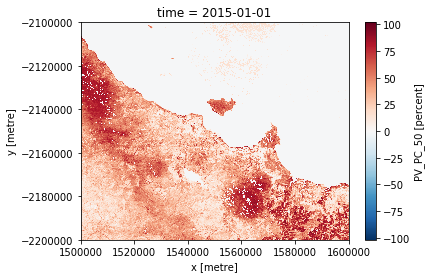

In [57]:
var_xarray.PV_PC_50.plot()

In [53]:
# var_xarray = dc.load(product="fc_percentile_albers_annual",
#                      x=(min_lon, max_lon),
#                      y=(min_lat, max_lat),
#                      output_crs='epsg:3577',
#                      resolution=(pixel_size_x, pixel_size_y),
#                      time=(start_time, end_time))

# # Check that dataset exists
# var_xarray

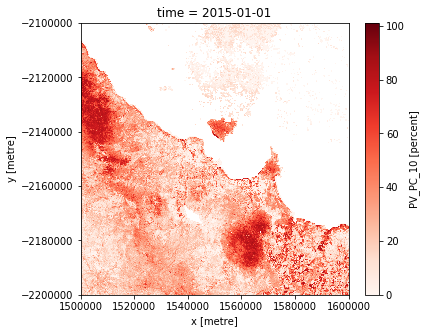

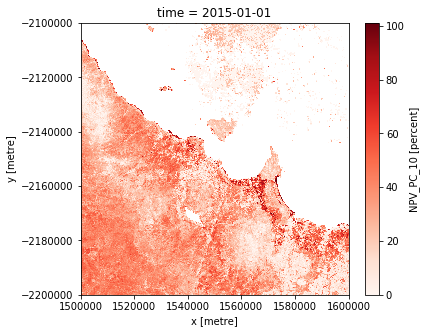

In [147]:
# Plot data
var_xarray = masking.mask_invalid_data(var_xarray)
var_xarray.PV_PC_10.plot(figsize=(6, 5), cmap = 'Reds')
var_xarray.NPV_PC_10.plot(figsize=(6, 5), cmap = 'Reds')

In [148]:
# Create binary layer representing vegetated (1) and non-vegetated (0)
vegetat_veg_cat_ds = ((var_xarray["PV_PC_50"] >= 60) | (var_xarray["NPV_PC_50"] >= 60))

In [149]:
# Convert to Dataset and add name
vegetat_veg_cat_ds = vegetat_veg_cat_ds.to_dataset(name="vegetat_veg_cat")

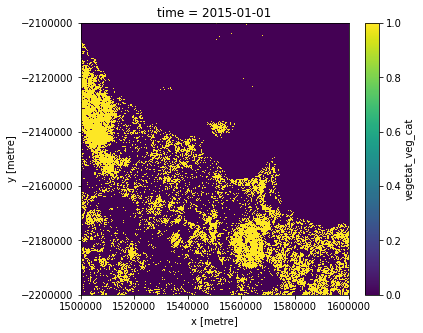

In [150]:
# Plot output
vegetat_veg_cat_ds["vegetat_veg_cat"].plot(figsize=(6, 5))

In [151]:
vegetat_veg_cat_ds = vegetat_veg_cat_ds.squeeze().drop('time')

### aquatic_wat_cat

In [63]:
var_xarray = dc.load(product="wofs_annual_summary",measurements=["frequency"], 
                     x=(min_x, max_x),
                     y=(min_y, max_y),
                     crs=out_crs,
                     resolution=(pixel_size_x, pixel_size_y),
                     time=time)

# Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:    (time: 1, x: 1000, y: 1000)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01
  * y          (y) float64 -2.1e+06 -2.1e+06 -2.1e+06 -2.1e+06 -2.1e+06 ...
  * x          (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.501e+06 ...
Data variables:
    frequency  (time, y, x) float32 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
Attributes:
    crs:      EPSG:3577

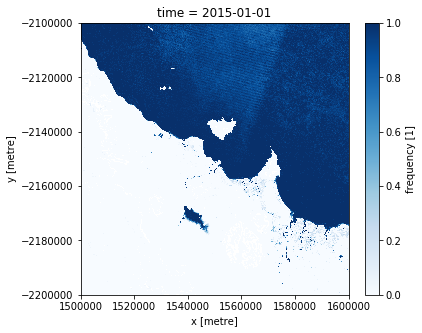

In [64]:
# Plot data
var_xarray = masking.mask_invalid_data(var_xarray)
var_xarray.frequency.plot(figsize=(6, 5), cmap = 'Blues')

In [65]:
# Create binary layer representing aquatic (1) and terrestrial (0)
aquatic_wat_cat_ds = ((var_xarray["frequency"] >= 0.2))

In [66]:
# Convert to Dataset and add name
aquatic_wat_cat_ds = aquatic_wat_cat_ds.to_dataset(name="aquatic_wat_cat")

In [67]:
aquatic_wat_cat_ds

<xarray.Dataset>
Dimensions:          (time: 1, x: 1000, y: 1000)
Coordinates:
  * time             (time) datetime64[ns] 2015-01-01
  * y                (y) float64 -2.1e+06 -2.1e+06 -2.1e+06 -2.1e+06 ...
  * x                (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 ...
Data variables:
    aquatic_wat_cat  (time, y, x) bool True True True True True True True ...

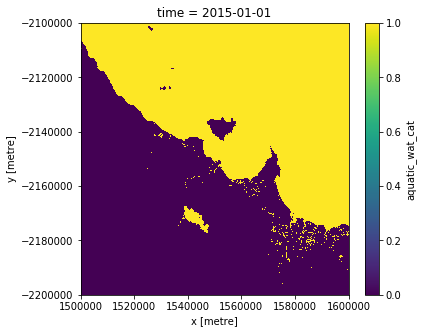

In [68]:
# Plot output
aquatic_wat_cat_ds["aquatic_wat_cat"].plot(figsize=(6, 5))

In [69]:
aquatic_wat_cat_ds = aquatic_wat_cat_ds.squeeze().drop('time')

### cultman_agr_cat

In [70]:
ls8_mads = dc.load(product="ls8_nbart_tmad_annual", x=(min_x, max_x),
                     y=(min_y, max_y),crs=out_crs,
                     resolution=(pixel_size_x, pixel_size_y),
                     time=time)

In [71]:
cultman_agr_cat = ((ls8_mads["edev"] > 0.115))

In [72]:
cultman_agr_cat = cultman_agr_cat.to_dataset(name="cultman_agr_cat")

In [73]:
cultman_agr_cat = cultman_agr_cat.squeeze().drop('time')

# alternative secret cultman


In [122]:
# chad_cult = xarray.open_rasterio('/home/jovyan/landcover-hack/cultivated_areas_layer/cultivated_land_01_wofs_townsville_015_201601_201801.tif')

In [123]:
# chad_cult = chad_cult.astype(bool)

In [124]:
# chad_cult = chad_cult.squeeze().drop('band')

In [216]:
# chad_cult.plot()

In [125]:
# cultman_agr_cat = chad_cult.to_dataset(name="cultman_agr_cat")

In [126]:
# variables_xarray_list.append(cultman_agr_cat)

### artific_urb_cat

#### Dry Bare Soil Index - DBSI

In [83]:
# Load data
ls8_gm = dc.load(product="ls8_nbart_geomedian_annual", **query)
ls8_gm = masking.mask_invalid_data(ls8_gm)

In [84]:
# calculate ndvi
ndvi = (ls8_gm.nir - ls8_gm.red) / (ls8_gm.nir + ls8_gm.red)
ndvi = ndvi.isel(time=0)

# calculate DBSI
dbsi = ((ls8_gm.swir1 - ls8_gm.green) / (ls8_gm.swir1 + ls8_gm.green)) - ndvi
dbsi = dbsi.squeeze().drop('time')
DBSI_bare = (dbsi > .26)
#DBSI_bare.plot()

In [105]:
# Create binary layer representing urban (1) and baresoil (0)
artific_urb_cat = (~DBSI_bare).to_dataset(name="artific_urb_cat")

#### MADs

In [ ]:
# Load data
# var_xarray = dc.load('product':"ls8_nbart_tmad_annual", **query)
# var_xarray = masking.mask_invalid_data(var_xarray)


In [ ]:
#bc = var_xarray.bcdev.isel(time=0)
#euc = var_xarray.edev.isel(time=0)
#spec = var_xarray.sdev.isel(time=0)

# Plot MAD data
# %matplotlib inline
# fig=pyplot.figure(figsize=(10, 10))
# columns = 2
# rows = 1
# ax = fig.add_subplot(1, 2, 1)
# ax.set_title("MAD spectral changes")
# ax.imshow(spec)

# ax1 = fig.add_subplot(1, 2, 2)
# ax1.set_title("MAD - very little spectral change")
# ax1.imshow(spec.where(spec < .002))
# pyplot.show()

### artwatr_wat_cat

In [87]:
var_xarray = dc.load(product="geofabric",measurements=["band1"],
                     x=(min_x, max_x),
                     y=(min_y, max_y),
                     crs=out_crs,
                     resolution=(pixel_size_x, pixel_size_y))

# Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:  (time: 1, x: 1000, y: 1000)
Coordinates:
  * time     (time) datetime64[ns] 2014-02-10T18:32:38
  * y        (y) float64 -2.1e+06 -2.1e+06 -2.1e+06 -2.1e+06 -2.1e+06 ...
  * x        (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.501e+06 ...
Data variables:
    band1    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
Attributes:
    crs:      EPSG:3577

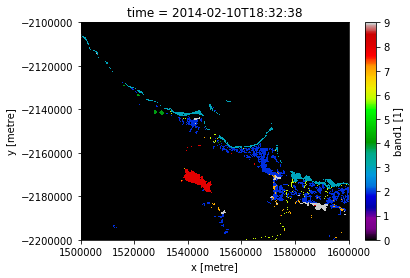

In [88]:
# Plot data
var_xarray.band1.isel(time=0).plot.imshow(cmap="nipy_spectral")

In [89]:
# Create binary layer representing artificial water (1) and natural water (0)
artwatr_wat_cat_ds = ((var_xarray["band1"] == 1) | (var_xarray["band1"] == 8))

In [90]:
# Convert to Dataset and add name
artwatr_wat_cat_ds = artwatr_wat_cat_ds.to_dataset(name="artwatr_wat_cat")

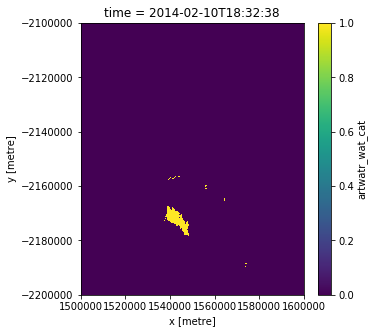

In [91]:
# Plot output
artwatr_wat_cat_ds["artwatr_wat_cat"].plot(figsize=(5, 5))

In [92]:
artwatr_wat_cat_ds = artwatr_wat_cat_ds.squeeze().drop('time')

In [152]:
variables_xarray_list = []
variables_xarray_list.append(artwatr_wat_cat_ds)
variables_xarray_list.append(aquatic_wat_cat_ds)
variables_xarray_list.append(vegetat_veg_cat_ds)
variables_xarray_list.append(cultman_agr_cat)
variables_xarray_list.append(artific_urb_cat)

## Classification

The LCCS classificaition is hierachial. The 8 classes are shown below.

| Class name | Code | Numeric code |
|----------------------------------|-----|-----|
| Cultivated Terrestrial Vegetated | A11 | 111 |
| Natural Terrestrial Vegetated | A12 | 112 |
| Cultivated Aquatic Vegetated | A23 | 123 |
| Natural Aquatic Vegetated | A24 | 124 |
| Artificial Surface | B15 | 215 |
| Natural Surface | B16 | 216 |
| Artificial Water | B27 | 227 |
| Natural Water | B28 | 228 |


In [153]:
# Merge to a single dataframe
classification_data = xarray.merge(variables_xarray_list)

In [154]:
# Apply Level 3 classification using separate function. Works through in three stages
level1, level2, level3 = lccs_l3.classify_lccs_level3(classification_data)

In [155]:
# Save classification values back to xarray
out_class_xarray = xarray.Dataset({"level1" : (classification_data["vegetat_veg_cat"].dims, level1),
                                   "level2" : (classification_data["vegetat_veg_cat"].dims, level2),
                                   "level3" : (classification_data["vegetat_veg_cat"].dims, level3)})
classification_data = xarray.merge([classification_data, out_class_xarray])
classification_data

col_level2 = cm.get_cmap("Set1", 2)
# classification_data.level2.plot(cmap=(col_level2))

In [156]:
print("level 1:",numpy.unique(classification_data.level1))
print("level 2:",numpy.unique(classification_data.level2))
print("level 3:",numpy.unique(classification_data.level3))

level 1: [100 200]
level 2: [10 20]
level 3: [111 112 123 124 215 216 227 228]


In [214]:
# from cartopy.feature import NaturalEarthFeature
# shp_fn = shpreader.natural_earth(resolution=resolution, category='cultural', name='populated_places')

# states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                                  name='admin_1_states_provinces_shp')

In [157]:
#Normalise L3 values for colour ramp
import numpy as np
lvl3=np.array([111, 112, 123, 124, 215, 216, 227, 228])
(lvl3 - min(lvl3)) / (max(lvl3) - min(lvl3))

array([0.        , 0.00854701, 0.1025641 , 0.11111111, 0.88888889,
       0.8974359 , 0.99145299, 1.        ])

In [158]:
from matplotlib.colors import LinearSegmentedColormap

cdict = {'red':  ( (0, 0.0, 1.0),   # Cultivated Terrestrial Vegetated rgb(0%, 69%, 20%)
                   (0.00854701, 0.0, 1.0),   # Natural Terrestrial Vegetated rgb(0%, 31%, 0%)
                   (0.1025641, 0.0, 1.0),   # Cultivated Aquatic Vegetated rgb(0%, 100%, 67%) 
                   (0.11111111, 0.0, 1.0),   # Natural Aquatic Vegetated rgb(0%, 42%, 33%)
                   (0.88888889, 0.32, 1.0),   # Artificial Surface rgb(32%, 36%, 40%)
                   (0.8974359, 0.36, 1.0),   # Natural Surface rgb(36%, 25%, 20%)
                   (0.99145299, 0.36, 1.0),   # Artificial Water rgb(36%, 67%, 93%)
                   (1, 0.16, 1.0)),  # Natural Water rgb(16%, 23%, 56%)


         'green': ( (0, 0.69, 1.0),   # Cultivated Terrestrial Vegetated rgb(0%, 69%, 20%)
                   (0.00854701, 0.31, 1.0),   # Natural Terrestrial Vegetated rgb(0%, 31%, 0%)
                   (0.1025641, 1.0, 1.0),   # Cultivated Aquatic Vegetated rgb(0%, 100%, 67%) 
                   (0.11111111, 0.42, 1.0),   # Natural Aquatic Vegetated rgb(0%, 42%, 33%)
                   (0.88888889, 0.36, 1.0),   # Artificial Surface rgb(32%, 36%, 40%)
                   (0.8974359, 0.25, 1.0),   # Natural Surface rgb(36%, 25%, 20%)
                   (0.99145299, 0.67, 1.0),   # Artificial Water rgb(36%, 67%, 93%)
                   (1, 0.23, 1.0)),  # Natural Water rgb(16%, 23%, 56%)

         'blue':  ( (0, 0.2, 1.0),   # Cultivated Terrestrial Vegetated rgb(0%, 69%, 20%)
                   (0.00854701, 0.0, 1.0),   # Natural Terrestrial Vegetated rgb(0%, 31%, 0%)
                   (0.1025641, 0.67, 1.0),   # Cultivated Aquatic Vegetated rgb(0%, 100%, 67%) 
                   (0.11111111, 0.33, 1.0),   # Natural Aquatic Vegetated rgb(0%, 42%, 33%)
                   (0.88888889, 0.40, 1.0),   # Artificial Surface rgb(32%, 36%, 40%)
                   (0.8974359, 0.20, 1.0),   # Natural Surface rgb(36%, 25%, 20%)
                   (0.99145299, 0.93, 1.0),   # Artificial Water rgb(36%, 67%, 93%)
                   (1, 0.56, 1.0)),  # Natural Water rgb(16%, 23%, 56%)
        }
L3_colour = LinearSegmentedColormap('L3_colour', cdict)

#plt.register_cmap(cmap=L3_colour)


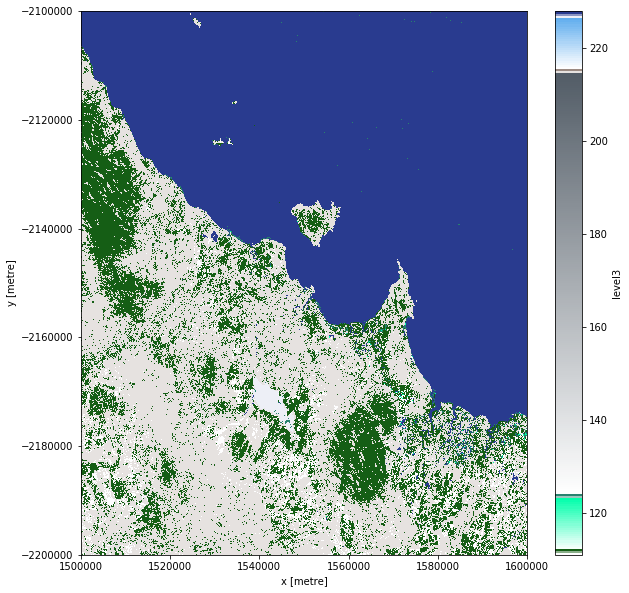

In [159]:
#pyplot.register_cmap(cmap=L3_colour)
classification_data.level3.plot(cmap=L3_colour, figsize=(10,10))



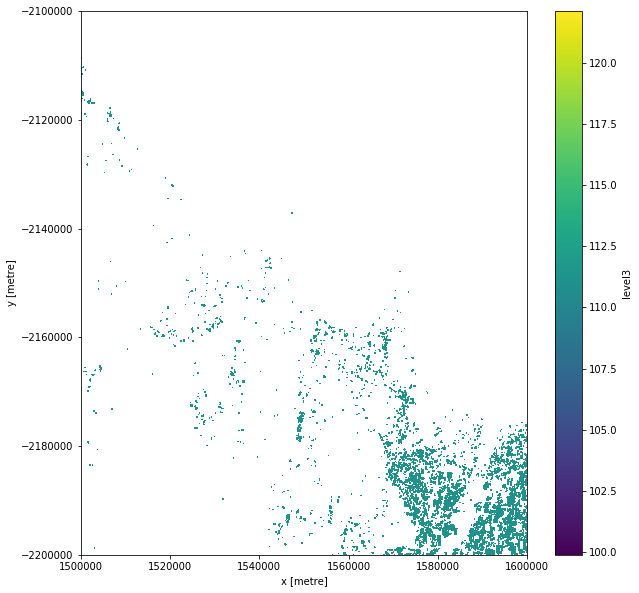

In [112]:
classification_data.level3.where(classification_data.level3 == 111).plot(figsize=(10,10))

In [114]:
bleh = classification_data.level3.where(classification_data.level3 == 111)#.plot()
bleh=bleh.drop('time').squeeze()
bleh.to_netcdf('test4.nc')

ValueError: One or more of the specified variables cannot be found in this dataset

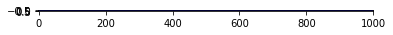

In [113]:
#To check the results for level 3 use colour_lccs_level3 to get the colour scheme.
red, green, blue, alpha = lccs_l3.colour_lccs_level3(level3[0])
pyplot.imshow(numpy.dstack([red, green, blue, alpha]))